# A.1) Collect and prepare data

# Machine Learning SP 2024/2025

- Prof. Cesare Alippi

---

# Lab 01: Linear Regression

---

# A) **Goal**: Predict opossum's length given other body lenghts

                                                               .,,.,,*(/*//*(,
                                                        *,,**/*,*/***,,*,***/((/***.
                                                    /*,,.*,,,***,,,,/*******,,,***/*,*((/*,,
                                                 **,,,,*,**,,,,,,*,,,*,***///(//**///(((&&&////,          ..
                                              .,,,*,,,,,,*****//****//(((/((////(#(((/((&&@&%,*/#///(///&&&&&#
                                           .,*,,,**,,,,,**,*,*(//*/(//(/(((/////////(/(*/@@@%#/#((((#(#&&&&&&*
                                          ,*,.,.,,,,*,,,***///((((/((((((///////(*//((//*,&%%,,,,*((***(&&&(
                                        .,,,,*,,,,,,,****/*///(*/((####//(((//*((((/(((*......,,,*//*,,,,*,
                                       ./(**,,*,,,,,,**////((/(###/###(##/(//**(#%#/((/,,....,,,,*//,,,,,,,.
                                      ,(((//***//***,,*//(//(*(/(##%%#(//((#((/(/(##(((*,..,,*,.,*(*,,,**,*,
                                   .####((//(/*////*//((#%(#(/(((###%(//((#%(##%##(####/,...*/@/,,*,*(%*,,*
                                 /#%###      .,*#%(#/#&&&%%/##(###%##(//(#%@&&%&#%%%%#(/*,...(%(..,,%&&,,,
                              //(/*,          .(&%%%#%%%&#%%((((/(#(#(##%&@@@@&@@@&&&&%((//. .,...,***..
                 \          /((//*              /%&%%&&@%######(/((((###((&@@@@@&@@%*   /./(...,.,***,,
                  (/(//(/((/                     %%&%%&#(##%%%%%%%%%%###(   &@@@@@*        .#..../**,&&&
                                                 ,%#%&@     ,&@@@@,           @&@@@           ..,**,&%%&&,
                                                  (@@@@      @@@@@             &&@@&                 &%@@@&
                                                   @&&@@,     @@@@@@@ #(        %&&@&*                  *@&%&%#&.



In [2]:
import pandas as pd             # Library for data manipulation
from sklearn.metrics import mean_squared_error          # Function to calculate the Mean Squared Error (our performance measure)
import numpy as np              # Library for arrays
import matplotlib.pyplot as plt # Library for plotting


url = 'https://drive.switch.ch/index.php/s/JDmUsXBZtvM5m1D/download'    # Data location
dataframe = pd.read_csv(url)    # Download the data as a pandas dataframe
dataframe.head()                # Show the first 5 data

,Head_Length,Skull_Width,Tail_Length,Foot_Length,Chest_Girth,Belly_Girth,Total_Length
0,94.1,60.4,36.0,74.5,28.0,36.0,89.0
1,92.5,57.6,36.5,72.5,28.5,33.0,91.5
2,94.0,60.0,39.0,75.4,30.0,34.0,95.5
3,93.2,57.1,38.0,76.1,28.0,34.0,92.0
4,91.5,56.3,36.0,71.0,28.5,33.0,85.5


In [3]:
data = dataframe.to_numpy()   # Convert the dataframe to a numpy array
print(data.shape)

(104, 7)


In [4]:
from sklearn.model_selection import train_test_split    # Function for splitting dataset into train and test

# Split data into train and test
train, test = train_test_split(data, train_size=0.7, shuffle=True, random_state=0)
print('train_data shape:', train.shape)
print('test_data shape:', test.shape)

"""
mu = train.mean(axis=0)
sigma = train.std(axis=0)
train = (train - mu)/sigma
test = (test-mu)/sigma
"""

train_data shape: (72, 7)
test_data shape: (32, 7)


'\nmu = train.mean(axis=0)\nsigma = train.std(axis=0)\ntrain = (train - mu)/sigma\ntest = (test-mu)/sigma\n'

In [5]:
# Divide input data (x) and labels (y)
x_train = train[:, 0:6]
y_train = train[:, -1]

x_test = test[:, 0:6]
y_test = test[:, -1]

**Train set** of $n_{train}=72$ observations $\{(\mathbf x_1, y_1), (\mathbf x_2, y_2) ,\dots,(\mathbf x_{n_{train}}, y_{n_{train}})\}$, where $\mathbf x_i\in\mathbb R^{d}$, with $d=6$ and $y_i\in\mathbb R$. All the observations are stack to form

$$
x\_train = \left[
\begin{array}{c}
\mathbf x_1\\
\mathbf x_2\\
\vdots \\
\mathbf x_{n_{train}}
\end{array}
\right]
\in \mathbb{R}^{n_{train}\times d},
\qquad
y\_train = \left[
\begin{array}{c}
y_1 \\
y_2 \\
\vdots \\
y_{n_{train}}
\end{array}
\right]
\in \mathbb{R}^{n_{train}}
$$

**Test set** of $n_{test}=32$ observations

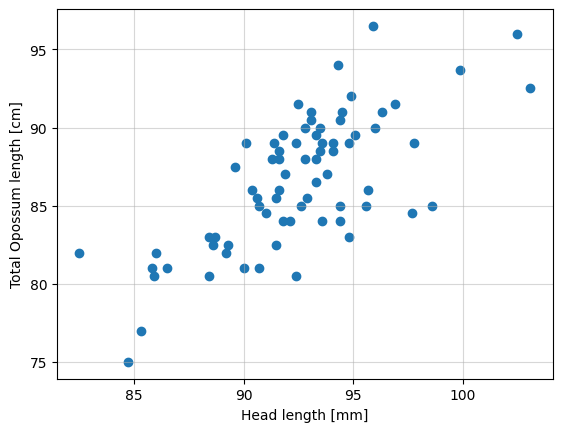

In [6]:
# Let's plot some data
plt.scatter(x_train[:, 0], y_train)  # x_train[:, 0] --> original Head_Length
plt.xlabel("Head length [mm]")
plt.ylabel("Total Opossum length [cm]")
plt.grid(alpha=0.5)
plt.show()

# A.2) Our model: Linear prior

We assume there is function $f(x)$ that links opossum's head length to its total length:
$$
y = f(x) + \eta
$$
where $\eta \sim N(0, \sigma^2_\eta)$.

We assume that $f(.)$ is linear:

$$
y = \theta_0 + \theta_1 x + \eta
$$

where $\theta_0$ and $\theta_1$ are the unknown parameters of our model

Between all the possible lines (so all the possible combinations of $\theta_0$ and $\theta_1$) we want to find the best parameters  ($\hat{\theta_0}$, $\hat{\theta_1}$) $\equiv$ $\hat{\boldsymbol \theta}$


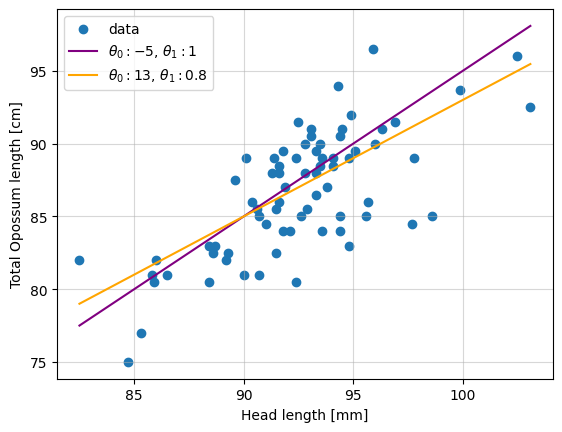

In [7]:
def linear_function(x, theta):
    y = theta[0] + x * theta[1]
    return y

# Plot previous figure
plt.scatter(x_train[:, 0], y_train, label='data')
plt.xlabel("Head length [mm]")
plt.ylabel("Total Opossum length [cm]")
plt.grid(alpha=0.5)

# Plot also 2 "random" guesses
equally_spaced_points = np.linspace(start=x_train[:, 0].min(), stop=x_train[:, 0].max(), num=1000)
plt.plot(equally_spaced_points, linear_function(equally_spaced_points, theta=[-5, 1]), 'purple', label=r'$\theta_0: -5$, $\theta_1: 1$')
plt.plot(equally_spaced_points, linear_function(equally_spaced_points, theta=[13, 0.8]), 'orange', label=r'$\theta_0: 13$, $\theta_1: 0.8$')
plt.legend()
plt.show()


# A.3) How to find $\hat{\boldsymbol \theta}$: 1D case

### The Performance Measure P
Since $\hat{\boldsymbol \theta}$ is unknown, we estimate it from the data, by minimising the following performance measure **on the training data**:
$$ \hat{\boldsymbol \theta} = \mathop{\mathrm{arg\,min}}_{\boldsymbol \theta} \frac{1}{n} \sum_{i=1}^n  (y_i - f(x_i;\boldsymbol \theta))^2 $$

Note that the $x_i$ is the i-th opossum.

Finally, to make a new prediction we use the parameters $\hat{\boldsymbol \theta}$
$$\hat y = f\left(x; \hat{\boldsymbol \theta}\right).$$

### Parameter estimation


**Data in compact form:**

We can add a "virtual feature" to the input to write everything in a compact form. More in detail we can prepend a '1' to each $\mathbf x$, this way we can write $f(x,\boldsymbol \theta)$ in a compact form. In fact:
$$
f(x,\boldsymbol \theta) = x^\top \boldsymbol \theta = \theta_0 1 + \theta_1 x
$$


**Find $\hat{\boldsymbol \theta}$**

We showed in class that the best set of parameters $\hat{\boldsymbol \theta}$
can be found by solving the linear system
$$
X^\top Y - X^\top X \boldsymbol \theta = 0
$$
with respect to the $\boldsymbol \theta$.

In [8]:
# Solve the linear system with np.linalg.solve()
# Compact form
head_lengths = x_train[:,0].reshape(-1,1)            # This is a (72,1) vector
ones_vector = np.ones(shape=(len(head_lengths),1))    # Create 72 ones
X = np.hstack((ones_vector, head_lengths))         # The compact input
print('Input (X) shape:\t', X.shape)

# Find theta_hat
theta_hat = np.linalg.solve(a=X.T.dot(X), b=X.T.dot(y_train))   # Solves ax = b with respect to x
print('Optimal parameters:\t', theta_hat)

Input (X) shape:	 (72, 2)
Optimal parameters:	 [11.97216328  0.80663246]


In [9]:
# There are also libraries for this
from sklearn.linear_model import LinearRegression

# init the model
lr = LinearRegression(fit_intercept=False)

# estimate parameters
lr.fit(X, y_train)
theta_hat2 = lr.coef_

print('theta_hat = \t{}'.format(theta_hat))
print('theta_hat2 = \t{}'.format(theta_hat2))

theta_hat = 	[11.97216328  0.80663246]
theta_hat2 = 	[11.97216328  0.80663246]


In [10]:
# We can also avoid creating a column of ones
lr = LinearRegression(fit_intercept=True)  # default is True
lr.fit(x_train[:,0].reshape(-1,1), y_train)
theta_hat3 = [lr.intercept_, lr.coef_[0]]
print('theta_hat3 = \t{}'.format(theta_hat3))

theta_hat3 = 	[np.float64(11.972163275129304), np.float64(0.8066324629348667)]


In [11]:
# Numerically validate the results
train_performance = mean_squared_error(linear_function(x_train[:, 0], theta=[-5, 1]),
                                       y_train)
test_performance = mean_squared_error(linear_function(x_test[:, 0], theta=[-5, 1]),
                                       y_test)


print("> Fit of line with parameters (-5, 1)")
print("1D Train performance: \t", round(train_performance, 2))
print("1D Test performance: \t", round(test_performance, 2))

train_performance = mean_squared_error(linear_function(x_train[:,0],theta_hat),
                                       y_train)
test_performance = mean_squared_error(linear_function(x_test[:, 0], theta_hat),
                                       y_test)


print("> Optimal fit")
print("1D Train performance: \t", round(train_performance, 2))
print("1D Test performance: \t", round(test_performance, 2))

> Fit of line with parameters (-5, 1)
1D Train performance: 	 10.1
1D Test performance: 	 10.51
> Optimal fit
1D Train performance: 	 8.75
1D Test performance: 	 12.15


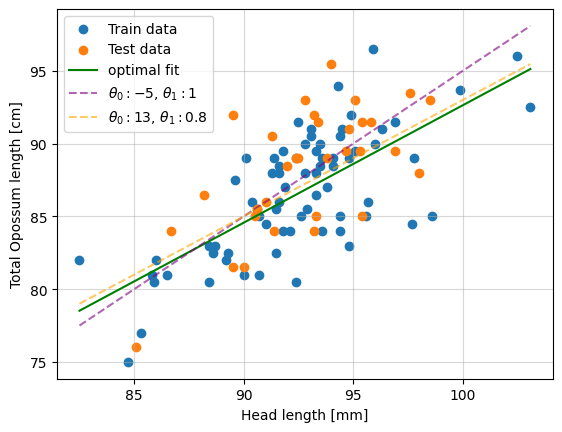

In [12]:
# plot the result
plt.scatter(x_train[:,0], y_train, label='Train data')
plt.scatter(x_test[:,0], y_test, label='Test data')
plt.plot(equally_spaced_points, linear_function(
    equally_spaced_points, theta_hat), 'g', label='optimal fit')
plt.plot(equally_spaced_points, linear_function(equally_spaced_points, theta=[-5, 1]), "--",  alpha=0.6, color='purple', label=r'$\theta_0: -5$, $\theta_1: 1$')
plt.plot(equally_spaced_points, linear_function(equally_spaced_points, theta=[13, 0.8]), "--", alpha=0.6, color='orange', label=r'$\theta_0: 13$, $\theta_1: 0.8$')
plt.xlabel("Head length [mm]")
plt.ylabel("Total Opossum length [cm]")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

# A.4) How to find $\hat{\boldsymbol \theta}$: d-D case

When each input data $\boldsymbol x_i$ is $d$-dimensional ($\boldsymbol x_i \in\mathbb R^{d}$), the linear model has the same form:
$$y = \mathbf x_i^\top \boldsymbol \theta = \theta_0 + x_{i1} \theta_1 + x_{i2} \theta_2+ \dots + x_{id}\theta_d.$$
with $\mathbf\theta \in\mathbb R^{d+1}$.

We can prepend a columns of '1's to $\boldsymbol x$ as before, or use `sklearn.linear_model.LinearRegression`


In [13]:
# Use LinearRegression with all the available features
d_linear_model = LinearRegression()
d_linear_model.fit(x_train, y_train)

# Numerically validate the results
# d-dimensional train
d_train_pred = d_linear_model.predict(x_train)
d_train_performance = mean_squared_error(d_train_pred, y_train)

# d-dimensional test
d_test_pred = d_linear_model.predict(x_test)
d_test_performance = mean_squared_error(d_test_pred, y_test)

print(f"d-D Train performance: \t{d_train_performance:.2f}")
print(f"d-D Test performance: \t{d_test_performance:.2f}")
print(f"1D Train performance: \t{train_performance:.2f}")
print(f"1D Test performance: \t{test_performance:.2f}")


d-D Train performance: 	4.69
d-D Test performance: 	6.63
1D Train performance: 	8.75
1D Test performance: 	12.15


# A.5) Liner regression with gradient descent



During the lectures we have seen that, given a model $f(x; {\boldsymbol \theta})$ it is possible minimize the training error iteratively using gradient descent:


$${\boldsymbol \theta}^{i+1} \gets {\boldsymbol \theta}^i - \varepsilon_L \frac{\partial V_n({\boldsymbol \theta})}{\partial {\boldsymbol \theta}} \bigg \rvert_{{\boldsymbol \theta} = {\boldsymbol \theta}^i}$$

Consider the mean squared error,
$$V_n({\boldsymbol \theta}) = {1 \over n}\sum_{i=1}^n\left(y_i - f(x_i; \boldsymbol \theta)\right)^2$$
In our case $f(x_i; \boldsymbol \theta)$ is linear: $f(x_i; \boldsymbol \theta) = \theta_0 + x_{i1} \theta_1 + x_{i2} \theta_2+ \dots + x_{id}\theta_d.$

So, we can write the gradient as:

$$\frac{\partial V_n({\boldsymbol \theta})}{\partial {\boldsymbol \theta}} =
\left[
\begin{array}{c}
\frac{\partial V_n({\boldsymbol \theta})}{\partial {\theta_0}} \\
\frac{\partial V_n({\boldsymbol \theta})}{\partial {\theta_1}} \\
\vdots \\
\frac{\partial V_n({\boldsymbol \theta})}{\partial {\theta_d}}
\end{array}
\right] =
\left[
\begin{array}{c}
-{2 \over n}\sum_{i=1}^n\left(y_i - f(x_i; \boldsymbol \theta)\right) \\
-{2 \over n}\sum_{i=1}^n\left(y_i - f(x_i; \boldsymbol \theta)\right)x_{i1} \\
\vdots \\
-{2 \over n}\sum_{i=1}^n\left(y_i - f(x_i; \boldsymbol \theta)\right)x_{id}
\end{array}
\right] = -{2 \over n}X^T(Y - X\boldsymbol \theta)$$

Let's do it in numpy.

In [14]:
# Compact form
ones_vector = np.ones(shape=(x_train.shape[0], 1))    # Create 72 ones
x_compact = np.hstack((ones_vector, x_train))         # The compact input

def calculate_gradient(X, Y, th):
  n = X.shape[0]
  gradient = (- 2 / n) * np.dot(X.T, (Y.reshape(-1,1) - np.dot(X, th).reshape(-1,1)))
  return gradient

def V(X, Y, theta):
  return np.mean((Y.reshape(-1,1) - np.dot(X, theta))**2)

np.random.seed(0)
theta = np.random.uniform(size=(x_compact.shape[1],1))     # initial value theta, it is random you can change it

# eps = 0.00002                                              # step size (hyperparameter)
eps=0.00005
# eps0 = 0.1
steps = 1000                                                # number of GD steps

thetas_history = np.zeros(shape=(theta.shape[0], steps+1))  # save the theta values along training
loss_history = np.zeros(shape=(steps+1,1))                  # save the error values along training
thetas_history[:,0:1] = theta.copy()
loss_history[0] = V(x_compact, y_train, theta)

for i in range(1, steps+1):
  grad = calculate_gradient(x_compact, y_train, theta)
  theta = theta - eps * grad
  # mask = np.zeros((7,1))
  # mask[0] = 1
  # theta = theta - eps0 * grad * mask
  # log theta and loss
  thetas_history[:,i:i+1] = theta.copy()
  loss_history[i] = V(x_compact, y_train, theta)


thetas_history = np.array(thetas_history)
loss_history = np.array(loss_history)
print('Optimal theta:', theta.T)
print(f'Mean Squared Error: {V(x_compact, y_train, theta):.2f}')

Optimal theta: [[0.54400448 0.25914517 0.23353834 0.48950951 0.19703328 0.41430604
  0.18715867]]
Mean Squared Error: 5.80


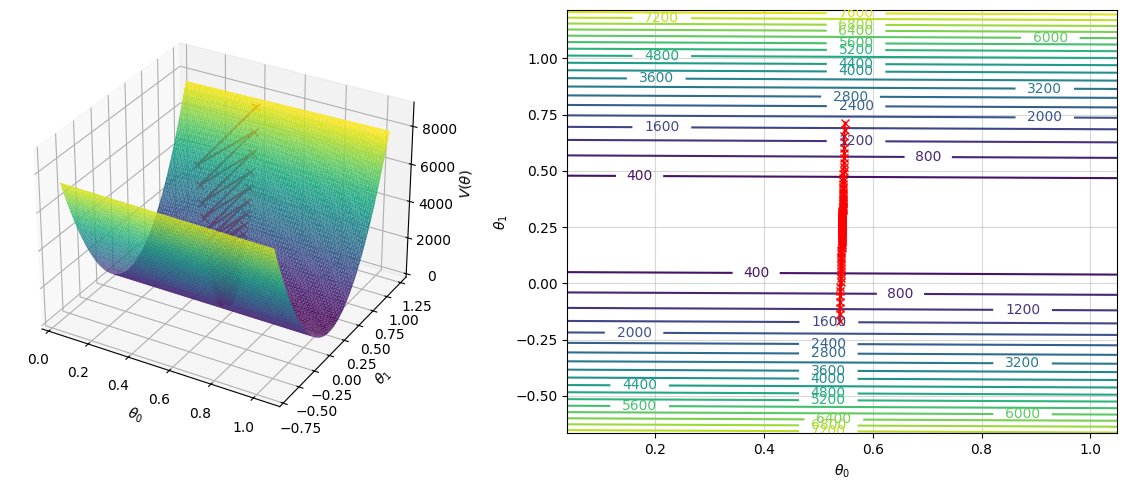

In [16]:
thetas_history01 = thetas_history[0:2, :]

# code for plotting
from mpl_toolkits.mplot3d import Axes3D

# Define plot range
r0_min, r0_max = thetas_history[0, :].min(), thetas_history[0, :].max()
r1_min, r1_max = thetas_history[1, :].min(), thetas_history[1, :].max()
x_range = np.linspace(r0_min-0.5, r0_max+0.5, 100)
y_range = np.linspace(r1_min-0.5, r1_max+0.5, 100)

# Calculate potential in that range
theta_0, theta_1 = np.meshgrid(x_range, y_range)
zs = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        T = np.hstack((theta_0[i, j], theta_1[i, j], theta[2:].reshape(-1,))) # NOTICE
        zs[i,j] = V(x_compact, y_train, T.reshape(7,1))

# Code for plotting
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(122)
ax1.set_xlabel(r'$\theta_0$')
ax1.set_ylabel(r'$\theta_1$')
c = ax1.contour(theta_0, theta_1, zs, levels=20,  cmap='viridis')
plt.clabel(c, inline=1, fontsize=10)

ax1.plot(thetas_history01[0, :], thetas_history01[1, :], '-x', color='red')
ax1.grid(alpha=0.5)

ax2 = fig.add_subplot(121, projection='3d')
ax2.plot_trisurf(theta_0.flatten(), theta_1.flatten(), zs.flatten(), cmap='viridis')
ax2.set_xlabel(r'$\theta_0$')
ax2.set_ylabel(r'$\theta_1$')
ax2.set_zlabel(r'$V(\theta)$')
ax2.plot(thetas_history01[0, :], thetas_history01[1, :], loss_history.flatten(), '-x', color='red', alpha=1.)
plt.tight_layout()

**BE CAREFUL!** The hypersurface you see is calculated fixing some values of $\theta$. This is why it is different from the red path.

This is the reason why the red path seems **NOT** to follow the gradient while descending

You can try to play with the step size. What happens if you increase/decrease it?



# A.6) Confidence intervals for the parameters
Assume that $X^\top X$ is invertible, then defining $X^+$ $\equiv$ $(X^TX)^{-1}X^T$ we have:

$$
\hat \theta = X^+Y \sim N\big(\theta, \sigma_\eta^2 (X^\top X)^{-1}\big)
$$

$$
E[\hat \theta] = E[X^+Y] = X^+E[Y] = X^+ X\theta^o = (X^\top X)^{-1}X^\top X \theta^o = \theta^o \longrightarrow \text{Unbiased Estimator}
$$

$$
Var[\hat \theta] = Var[X^+Y] = X^+Var[Y] (X^+)^\top = \sigma_\eta^2 (X^\top X)^{-1} X^\top X (X^\top X)^{-1} = \sigma_\eta^2 (X^\top X)^{-1}
$$

$$
\hat{\sigma_\eta}^2 = \frac{1}{n-d} \sum_{i=1}^n(y_i - f(x_i; \boldsymbol \theta))^2
$$

A rule of thumb is the following

* Extract the diagonal from $\hat{\sigma_\eta}^2 (X^\top X)^{-1}$, which gives you an idea of the variance of each component of $\theta$.
* For each component $\theta_i$, check if the interval $(\theta_i - 2\sigma_i, \theta_i + 2\sigma_i)$ contains the zero; if that is the case, we are not very confident that the $\theta_i\ne 0$, thus that $x_i$ is relevant in the model.
* **BE CAREFUL:** This is a rule of thumb, be sure |$Var[\hat \theta]_{ii}$| >> |$Var[\hat \theta]_{ij}$| $\forall$ j
* **BE CAREFUL:** Features must be centered around 0.

In [17]:
sigma_square = d_train_performance / (x_compact.shape[0] - x_compact.shape[1])
theta_var =  np.linalg.inv(np.dot(x_compact.T, x_compact)) * sigma_square

Text(0.5, 1.0, 'Processed covariance matrix of $\\hat{\\theta}$')

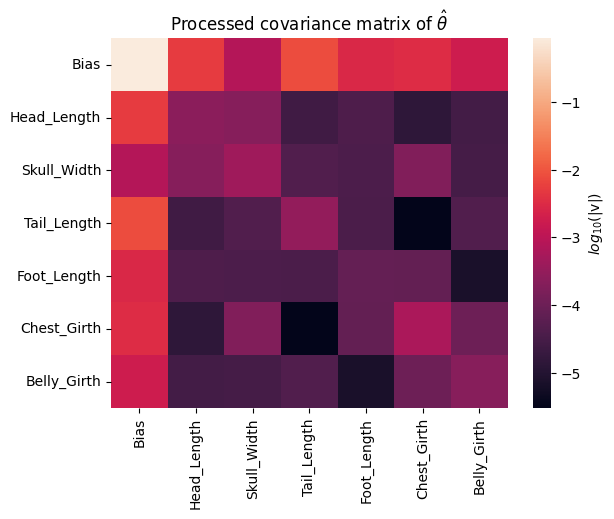

In [19]:
import seaborn as sns

ticklabels = dataframe.keys()[:-1].insert(0, 'Bias')

fig = sns.heatmap(np.log10(np.abs(theta_var)), cbar_kws={'label':r'$log_{10}$(|v|)'},  # Notice we calculated the log of the absolute of theta_var
                  xticklabels=ticklabels, yticklabels=ticklabels)
fig.set_title(r'Processed covariance matrix of $\hat{\theta}$')


In [20]:
print(f'theta_hat[0]: {d_linear_model.intercept_:.7f}')
print(f'Var[theta_hat[0]]: {theta_var[0,0]:.7f}')

theta_hat[0]: -15.6053102
Var[theta_hat[0]]: 0.8745384


So, can we set $\theta_0$ = 0?

In [21]:
# Use LinearRegression with all the available features
nobias_linear_model = LinearRegression(fit_intercept=False)
nobias_linear_model.fit(x_train, y_train)

# Numerically validate the results
# test
nobias_test_pred = d_linear_model.predict(x_test)
nobias_test_performance = mean_squared_error(nobias_test_pred, y_test)

print(f"d-D Test performance: \t{d_test_performance:.2f}")
print(f"d-1 D Test performance: \t{nobias_test_performance:.2f}")


d-D Test performance: 	6.63
d-1 D Test performance: 	6.63


---

## B) **Goal**: apply Regularization to polynomial features

Regularization can be used with on the examples seen so far, but in order to appreciate it better, we are going to apply it to polynomials




### Example: Polynomials

$$f(x;\boldsymbol \theta) = \theta_0 + x \theta_1 + x^2 \theta_2 + \dots + x^d \theta_d$$


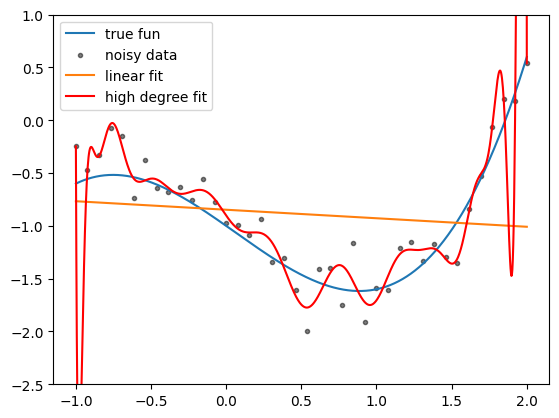

In [22]:
from sklearn.preprocessing import PolynomialFeatures
def polynomial_function(x):
    return -1 -x - .1 * x**2 + .5*x**3

# generate data
n = 40
X = np.linspace(-1, 2, n).reshape(n,1)
interval = np.linspace(-1, 2, 1000).reshape(1000,1)
sigma = 0.2
np.random.seed(0)
eta = np.random.normal(loc=0, scale=sigma, size=(n,1)) # Add noise
Y = polynomial_function(X) + eta

# Fit a LOW degree polynomial (line)
degree = 1
pol_feat = PolynomialFeatures(degree=degree, include_bias=False) # Generate new features x --> x
Xpol = pol_feat.fit_transform(X)

lr = LinearRegression(fit_intercept=True)
lr.fit(Xpol, Y)
Y_est = lr.predict(pol_feat.transform(interval))

# Fit a HIGH degree polynomial
degree = 30

pol_feat_high = PolynomialFeatures(degree=degree, include_bias=False) # Generate new features x --> [x^1, x^2, x^3, ..., x^30]
Xpol_high = pol_feat_high.fit_transform(X)

lr_high = LinearRegression(fit_intercept=True)
lr_high.fit(Xpol_high, Y)
Y_est_high = lr_high.predict(pol_feat_high.transform(interval))

# plot results
plt.plot(interval, polynomial_function(interval), label='true fun')
plt.scatter(X, Y, label='noisy data', c='k', marker='.', alpha=0.5)
plt.plot(interval, Y_est, label='linear fit')
plt.plot(interval, Y_est_high, 'r', label='high degree fit')
plt.ylim((-2.5, 1))
plt.legend()


# B.1) Ridge regression

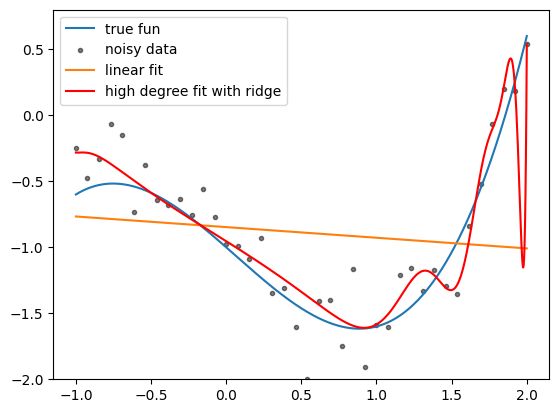

In [23]:
# Fit a HIGH degree polynomial
degree = 30

pol_feat_high = PolynomialFeatures(degree=degree, include_bias=False)
Xpol_high = pol_feat_high.fit_transform(X)

# Ridge regression
from sklearn.linear_model import Ridge
ridge_high = Ridge(alpha=1, fit_intercept=True)
ridge_high.fit(Xpol_high, Y)
Y_ridge = ridge_high.predict(pol_feat_high.transform(interval))

# plot results
plt.plot(interval, polynomial_function(interval), label='true fun')
plt.scatter(X, Y, label='noisy data', c='k', marker='.', alpha=0.5)
plt.plot(interval, Y_est, label='linear fit')
plt.plot(interval, Y_ridge, 'r', label='high degree fit with ridge')
plt.ylim((-2, 0.8))
plt.legend()
plt.show()

In [24]:
Xpol_high.shape

(40, 30)

Why do you think some points are overfitting more?

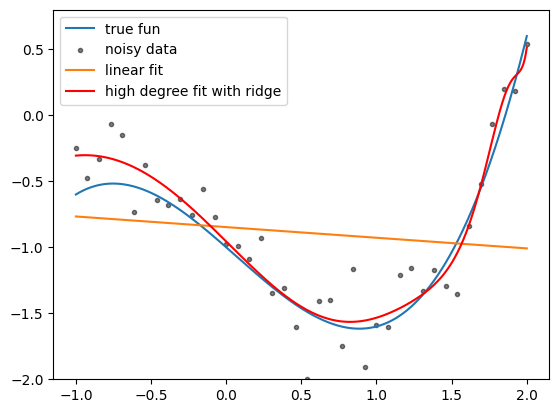

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xpol_high_scaled = scaler.fit_transform(Xpol_high)

# Ridge regression
ridge_high = Ridge(alpha=0.01, fit_intercept=True)
ridge_high.fit(Xpol_high_scaled, Y)
Y_ridge = ridge_high.predict(scaler.transform(pol_feat_high.transform(interval)))

# plot results
plt.plot(interval, polynomial_function(interval), label='true fun')
plt.scatter(X, Y, label='noisy data', c='k', marker='.', alpha=0.5)
plt.plot(interval, Y_est, label='linear fit')
plt.plot(interval, Y_ridge, 'r', label='high degree fit with ridge')
plt.ylim((-2, 0.8))
plt.legend()
plt.show()


**BE CAREFUL:** At the begining of this class we did not normalize the Opossum's features. As you may have noticed it is often either a good practice or essential!

# B.2) Lasso regression


Try implementing Lasso regression. As input data use the same data as before, again with degree=30 (So you may re-use `Xpol_high_scaled`, `Y`, ...)

HINT: use `sklearn.linear_model.Lasso`

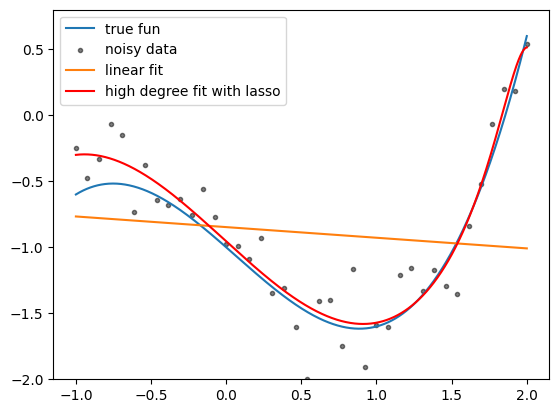

In [26]:
# Try it yourself!

from sklearn.linear_model import Lasso

# Ridge regression
alpha=0.001
lasso_high = Lasso(alpha=0.001, fit_intercept=True, max_iter=50000)
lasso_high.fit(Xpol_high_scaled, Y)
Y_lasso = lasso_high.predict(scaler.transform(pol_feat_high.transform(interval)))

# plot results
plt.plot(interval, polynomial_function(interval), label='true fun')
plt.scatter(X, Y, label='noisy data', c='k', marker='.', alpha=0.5)
plt.plot(interval, Y_est, label='linear fit')
plt.plot(interval, Y_lasso, 'r', label='high degree fit with lasso')
plt.ylim((-2, 0.8))
plt.legend()
plt.show()

Q1) What is approximately the best value $\hat{\alpha}$ for $\alpha$?

Q2) What happens for $\alpha$ << $\hat{\alpha}$? Why? (Notice if a warning appears! Why do you think there was no warning with Ridge?)

Q3) What happens for $\alpha$ >> $\hat{\alpha}$? Why?